# Worksheet 12

Name: Prathmesh Sonawane  

UID: U39215370

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1) Yes. Here, we can classify students in two categories, one for getting a job and one for not. We can train our model using existing data on this topic. 

2) No. There can be an infinite number of categories, and thus, this would not be a classification problem. 
3) Yes. We can have five seperate categories (1-5) and train our model on existing data. 
4) No. Like number 2, this problem could have an infinite amount of categories, and thus it is not a classification problem. 

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

Given a dataset, you can split up your data into two categories, that being the testing and training data sets. Using the training set, you can train your model. After you have done so, you can test your model against the testing set to see how effective the model is. Since the model was not trained using the testing dataset, using it after the training phase will give you a good idea of how well the model performs. 

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

Underfitting is when you make a model that is too simple, where you can’t really learn anything new about the data at hand. When you overfit a model, the model is too specific to the dataset we have and will not generalize well when it's used on new data. For underfitting, a model would have more mistakes than desired by not being specific enough to accurately model the data we are training with. For overfitting, we would be concerned when our model does not make any or at least a couple of mistakes. In this case, though our model is super specific to our training data and makes very little mistakes, when tested on more data, it will make more mistakes since the data is not the same as the one trained with. You want to keep editing the model until you find that increasing the complexity of the model on the training data results in a large increase in mistakes when it comes to the testing data. When we find this point, this is the sign that we have a good model. 

### K Nearest Neighbors

In [59]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}
print(data["Attribute A"])


[3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0.0, 10]


a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

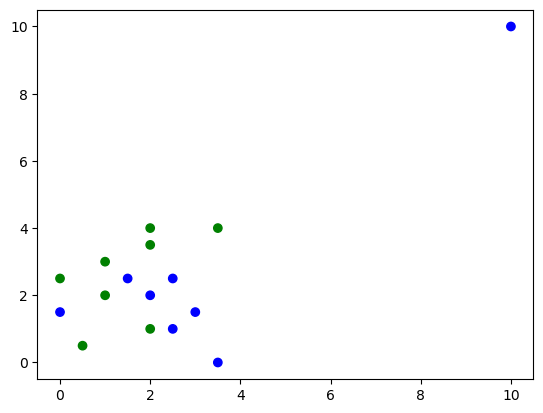

In [60]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

Yes. The point (10,10) is definitely an outlier as it deviates largely from the rest of the dataset. 

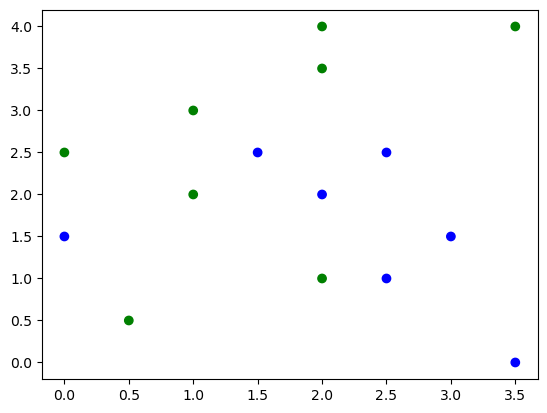

In [61]:
data["Attribute A"].remove(10)
data["Attribute B"].remove(10)
data["Class"] = data["Class"][:-1]

colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

Point (3.5,0) looks like a noise point as it makes the entire dataset seem to have no general trend. However, if we remove that point, we see that most of the points in the dataset together form a positive correlation. In this correlation, points with a higher A value seem to have a higher B value, and vice versa. 

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

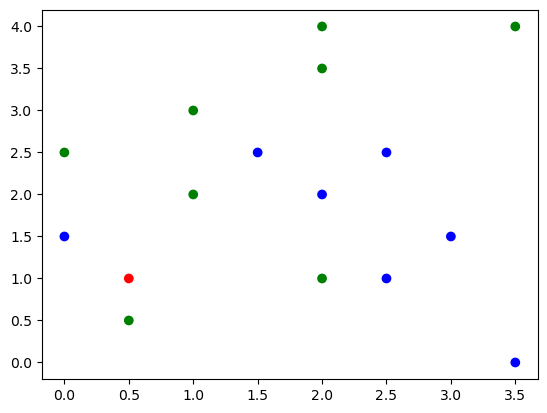

In [62]:
#data is your data 
data["Attribute A"].append(0.5)
data["Attribute B"].append(1)
data["Class"].append(2)

colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

[(0.5, 0.5, 0.5, 1), (0, 1.5, 0.7071067811865476, 0), (1, 2, 1.118033988749895, 1)]
1.118033988749895


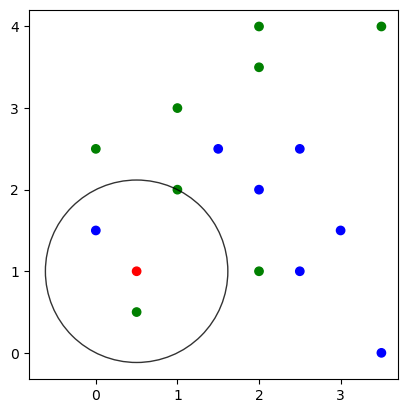

In [63]:
def n_closest_to(example, n):
    x_cord = example[0]
    y_cord = example[1]
    list = []
    answer = []

    #Find Distances
    for i in range (len (data["Attribute A"])):
        newx_cord = data["Attribute A"][i]
        newy_cord = data["Attribute B"][i]

        distance = ((x_cord - newx_cord)**2 + (y_cord - newy_cord)**2)**(1/2) 
        newPointdata = (data["Attribute A"][i],data["Attribute B"][i], distance, data["Class"][i])

        if ((x_cord == newx_cord) and (y_cord == newy_cord)):
            continue
        list.append(newPointdata)

    for i in range (3): 
        answerPoint = list[0]
        for j in (list[1:]):
            if (j[2] < answerPoint[2]):
                answerPoint = j
        answer.append(answerPoint)
        list.remove(answerPoint)
    
    return answer

#Call Function 
point = (0.5,1)
result = n_closest_to(point, data)
print(result)

location = point
radius = max(max(result[0][2],result[1][2]),result[2][2])
print(radius)
_, axes = plt.subplots()
axes.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
cir = plt.Circle(location, radius, fill = False, alpha=0.8)
axes.add_patch(cir)
axes.set_aspect('equal') # necessary so that the circle is not oval
plt.show()

f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [75]:
def majority(points):
    list = [0,0]
    for point in points: 
        if (point[3] == 1):
            list[1] = list[1]+1
        else:
            list[0] = list[0] + 1
    
    #If list[0] is greater, more of class 0 points exist
    if (list[0] > list[1]):
        return 0
    else:
        return(1)


print("Class is ", majority(n_closest_to(point, data)))


Class is  1


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [79]:
#Remove red point
data["Attribute A"] = data["Attribute A"][:-1]
data["Attribute B"] = data["Attribute B"][:-1]
data["Class"] = data["Class"][:-1]


count = 0
for i in range(len (data["Attribute A"])):
    testPoint = (data["Attribute A"][i],data["Attribute B"][i])
    actual_class = data["Class"][i]

    prediction = majority(n_closest_to(testPoint, data))
    if prediction == actual_class:
        count += 1

print("overall accuracy = " , count/len(data["Class"]))

overall accuracy =  0.7333333333333333


## Challenge Problem

For this question we will re-use the "mnist_784" dataset.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from).

In [66]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

X, y = fetch_openml(name='mnist_784', version=1, return_X_y=True, as_frame=False, parser='auto')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

b) For K ranging from 1 to 20:

1. train a KNN on the training data
2. record the training and testing accuracy

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.

100%|██████████| 20/20 [36:09<00:00, 108.48s/it]


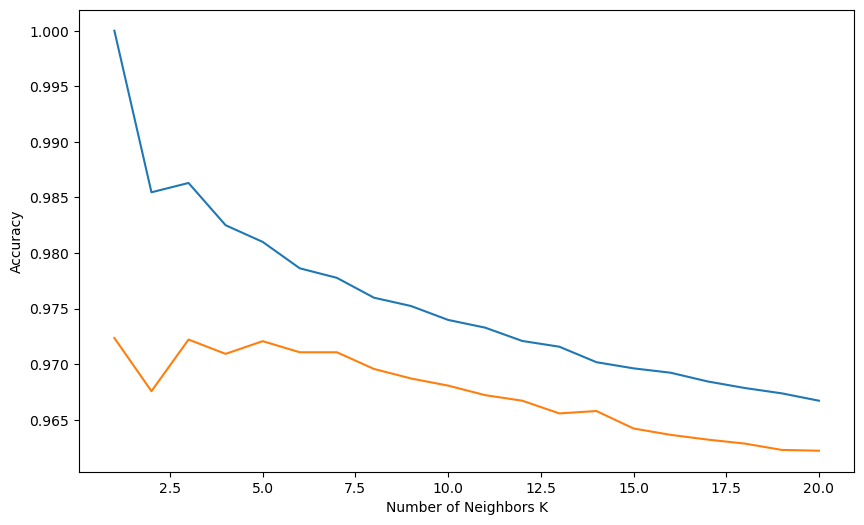

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Add this so we can see progress: 
from tqdm import tqdm

#Create List to store your accuracies
training_accuracies = []
testing_accuracies = []

for k in tqdm(range (1,21)):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train) 
  y_train_pred = knn.predict(X_train)
  y_test_pred = knn.predict(X_test)

  training_accuracies.append(accuracy_score(y_train, y_train_pred))
  testing_accuracies.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(10, 6))
plt.plot(range(1,21), training_accuracies, label='Training Accuracy')
plt.plot(range(1,21), testing_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.show()




Explanation: From the model, it looks like the optimal value of K is 3. At this value, both the training and testing datasets have high accuracy when tested against the model. At k=1, the accuracy is also high, but we disregard this as using this K value on the training set will undoubtedly result in a high accuracy since our model is specifically trained with that training dataset. In addition, at k=1, we simply decide a point class by looking at its class, which will trivially result in 100% accuracy and a loss of generality. 

c) Using the best model from b), pick an image at random and plot it next to its K nearest neighbors

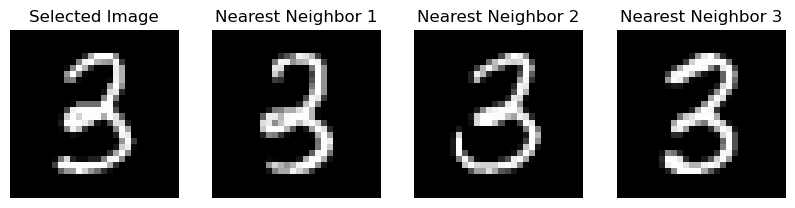

In [58]:
# Select a random image from the test set
np.random.seed(0)
index = np.random.randint(0, X_test.shape[0])
image = X_test[index]

# Train the best KNN model at K=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
distances, indices = knn.kneighbors([image])

plt.figure(figsize=(10, 6))
plt.subplot(1, 4, 1)
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title("Selected Image")
plt.axis('off')
for i, index in enumerate(indices[0], start=1):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_train[index].reshape(28, 28), cmap='gray')
    plt.title(f"Nearest Neighbor {i}")
    plt.axis('off')
plt.show()

d) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat b) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension and why you think the performance / accuracy of the model has changed.

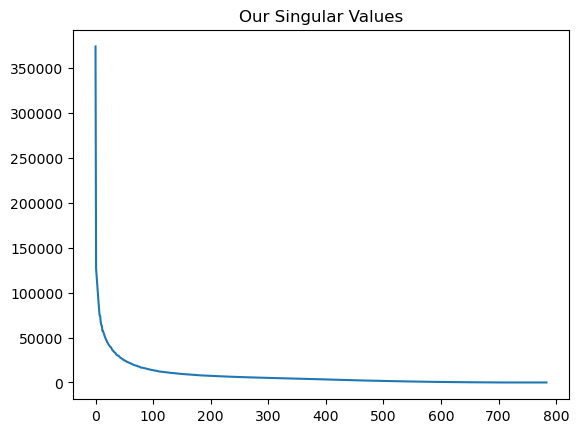

In [70]:
from sklearn.pipeline import make_pipeline

u, s, vt = np.linalg.svd(X_train, full_matrices=False)

plt.plot(s) 
plt.title("Our Singular Values")
plt.show()


#model = make_pipeline(dimensionality_reduction, knn_model)
#model.fit(...)

Training progress...: 100%|██████████| 20/20 [02:55<00:00,  8.78s/it]


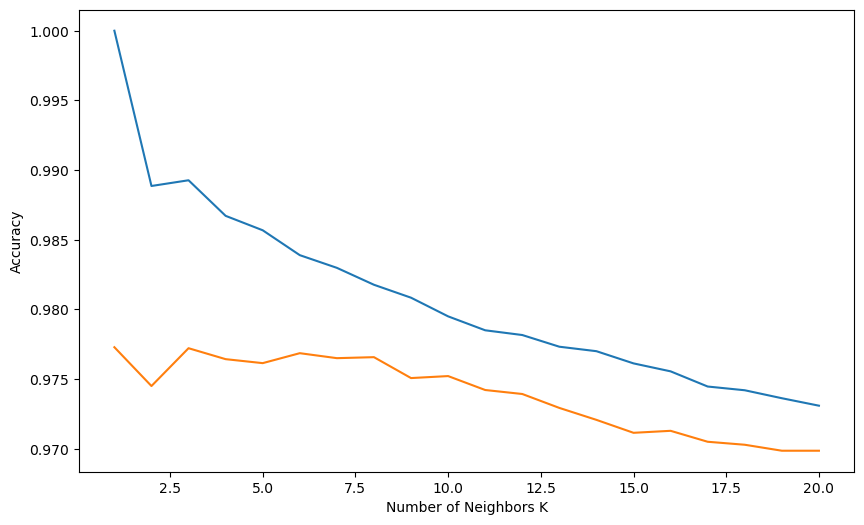

In [74]:
from sklearn.pipeline import make_pipeline 
from sklearn.decomposition import TruncatedSVD

K_range = range(1, 21)
training_accuracies = []
testing_accuracies = []

for K in tqdm(K_range, desc='Training progress...'):
    dimensionality_reduction = TruncatedSVD(n_components=50) 
    knn_model = KNeighborsClassifier(n_neighbors=K)
    # create a pipeline
    model = make_pipeline(dimensionality_reduction, knn_model)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    training_accuracies.append(accuracy_score(y_train, y_train_pred))
    testing_accuracies.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(10, 6))
plt.plot(K_range, training_accuracies, label='Training Accuracy')
plt.plot(K_range, testing_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.show()

Explanation: 

Similarities + Differences: For both graphs, it seems that choosing a k of around 3 is most optimal, whether we reduce the dimensionality of our data or not. However, it seems that our overall performance has increased slightly by reducing the dimensionality as our testing and training data receive higher accuracy (~0.005). In addition, I also noticed that by reducing the dimensionality, the iteration of each for-loop pass for k was far quicker. 

Choice of Dimension: I chose a dimension of 50 since, when plotting our singular values, choosing any values after 50 results in including singular values that no longer add much information to our model. If we add less singular values, we don’t capture all the relevant information. However, including any more will result in more costs via time and space for the marginal added information we get. 

Performance Increasing Reasoning: Firstly, by reducing the dimensionality, we perform less computations, resulting in a quicker speed when running our program. In addition, reducing the dimensionality removes noise points from our data, which can result in higher accuracy when running KNN clustering. 



## Midterm Prep (Part 1)

Compete in the Titanic Data Science Competition on Kaggle: https://www.kaggle.com/c/titanic 

Requirements:

1. Add at least 2 new features to the dataset (explain your reasoning below)
2. Use KNN (and only KNN) to predict survival
3. Explain your process below and choice of K
4. Make a submission to the competition and provide a link to your submission below.
5. Show your code below